# Import

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor           # KNN을 이용한 숫자 예측 알고리즘.
from sklearn.linear_model import LinearRegression           # 선형 회귀를 이용한 숫자 예측 알고리즘.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score       # 회귀 평가 지표들
from sklearn.preprocessing import PolynomialFeatures        # 다차항을 추가해 주는 변환기
from sklearn.pipeline import Pipeline                       # 변환기와 추정기를 연결해서 추정기 역할을 하는 클래스.

# **머신 러닝(Machine learing) 종류** - 사람의 감독 하에 훈련하는 것인 지 아닌 지 분류
*   지도 학습(Supervised Learning): 레이블(타겟)이 있는 데이터를 학습.
    *   분류(classification): 클래스들을 분류.
    *   회귀(regression): 숫자 예측.


*   비지도 학습(Unsupervised Learning): 레이블이 없는 데이터를 학습.
    *   군집(clusterling)
    *   시각화(visualization)
    *   이상치(outlier) 탐지

*   준지도 학습(semi_supervised learning): 비지도 학습 + 전문가 시스템

*   강화 학습(reinforcement learning): 보상과 벌칙을 통해서 학습.


# 문제

fish 데이터셋에서 물고기의 무게 예측.
*   perch(농어)의 무게를 길이 특성만으로 예측
    *   Weight(관심 변수, 레이블, 타겟) ~ Length(독립 변수, 특성(feature))
    *   KNN, Linear Regression
*   Perch의 무게를 다른 4개의 특성들로 예측.
    *   Weight ~ Length + Diagonal + Height + width
    *   Linear Regression

In [274]:
path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [275]:
fish = pd.read_csv(path)

In [276]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [277]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [278]:
perch = fish[fish.Species =='Perch']
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


농어의 Weight를 Length 만으로 예측할 수 있을까?
*   특성(feature): Length -> 2차원 배열
*   레이블(label), 타겟(target): wegiht -> **1차원 배열**

In [279]:
# 특성 배열
X = perch[['Length']].values.copy()

In [280]:
X[:5]

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])

In [281]:
X.shape             #> 샘플개수 56 특정개수:1

(56, 1)

In [282]:
# 타겟 배열
y = perch['Weight'].values.copy()

In [283]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

In [284]:
y.shape

(56,)

#t train-test split

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [286]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42, 1), (14, 1), (42,), (14,))

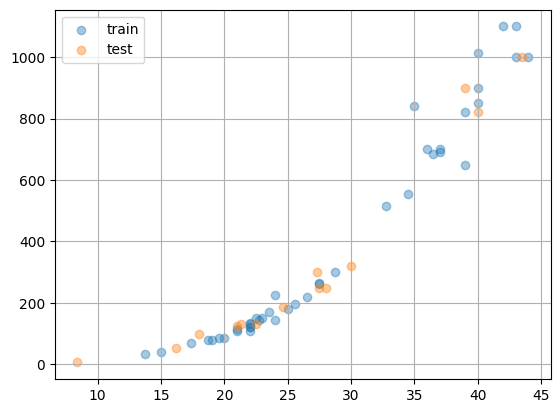

In [287]:
# y(Weight)~ X(Length) 산점도 시각화. 훈련 셋. 테스트 셋 구분
plt.scatter(X_train, y_train, label = 'train', alpha = 0.4)
plt.scatter(X_test, y_test, label = 'test', alpha = 0.4)

plt.grid()
plt.legend()
plt.show()

# 모델 훈련, 평가

KNN(K-Nearest Neighbors) Regressor: 가장 가까운 k개의 이웃들의 레이블(타겟) 평균 값으로 숫자를 예측하는 모델.

In [288]:
knn = KNeighborsRegressor()

In [289]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [290]:
knn.score(X_train,y_train)

0.9698823289099254

In [291]:
train_pred = knn.predict(X_train)       # 훈련 셋의 예측값 = 예측한 무게

In [292]:
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [293]:
y_train     #실제 값

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [294]:
test_pred = knn.predict(X_test)
test_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [295]:
y_test          # 테스트 셋의 실제값

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

# 회귀 모델의 평가 지표(metrics)

*   MSE(Mean Squared Errors): 오차들의 제곱의 평균.
*   RMSE(Root Meean Squared Errors): MSE의 제곱근.
*   MAE(Mean Absolute Errors): 오차들의 절대값의 평균.
*   MSE, RMSE, MAE는 값이 작을 수록 좋은 점수, 값이 클 수록 나쁜 점수.
    *   일반 적인 평가지표들은 값이 클 수록 좋은 점수, 값이 작을 수록 나쁜 점수.
    *   회귀 문제에서도 오차들이 작을 수록 점수가 커지는 평가지표를 개발 -> R2 score.

* $ y_i $ : $i$번째 샘플의 실젯값(label)
* $ \hat{y_i} $ : $i$번째 샘플의 예측값
* $ \bar{y} $ : 타겟의 평균값
* $ n $ : 샘플 개수

* MAE(Mean Absolute Errors)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* MSE(Mean Squared Errors)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2
$$

* RMSE(Root Mean Squared Errors)
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2 }
$$

* $ R^2 $ score(Coefficient of determinant, 결정 계수)
$$
R^2 = 1 - \dfrac{\text{MSE}}{\text{Variance}}
    = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.

In [296]:
# 훈련 셋의 MSE
mean_squared_error(y_train, train_pred)

3716.5161904761903

In [297]:
# 훈련 셋의 RMSE
np.sqrt(mean_squared_error(y_train, train_pred))

np.float64(60.96323638453089)

In [298]:
# 훈련 셋의 MAE
mean_absolute_error(y_train, train_pred)

35.76190476190476

In [299]:
# 테스트 셋의 MSE
mean_squared_error(y_test, test_pred)

721.7385714285714

In [300]:
# 테스트 셋의 MAE
mean_absolute_error(y_test, test_pred)

19.157142857142862

테스트 셋에서의 평가지표가 훈련 셋에서의 평가지표보다 더 좋음 -> 과소적합(underfitting)


In [301]:
# 훈련 셋 결정 계수(r2 score)
r2_score(y_train, train_pred)

0.9698823289099254

In [302]:
# 테스트 셋 결정 계수
r2_score(y_test, test_pred)

0.992809406101064

# KNN Regressor 문제점

outlier가 있는 경우 오차가 커질 수 있음.

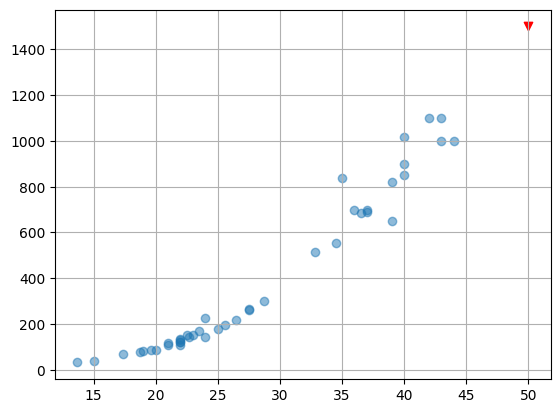

In [303]:
# 훈련 셋 시각화
plt.scatter(X_train, y_train, alpha = 0.5)

# 가상의 물고기(outlier: 50cm, 1500g)
plt.scatter(50,1500,color = 'red', marker = 'v')

plt.grid()
plt.show()

In [304]:
# 길이 50cm인 물고기의 무게 예측값.
prediction = knn.predict([[50]])
prediction

array([1010.])

In [305]:
indices = knn.kneighbors([[50]], return_distance= False)

In [306]:
indices             # 가상의 물고기와 가장 가까운 훈련 셋 샘플의 인덱스 5개

array([[34, 14,  8, 40,  6]])

In [307]:
y_train[indices[0]]        # 가장 가까운 5개 샘플의 레이블(무게)

array([1000., 1100., 1000., 1100.,  850.])

머신 러닝의 종류 -  단순하게 알고 있는 데이터 포인트와 새 데이터 포인트를 비교하는 것인지, 아니면 훈련 셋에서 패턴(공식 발견)해서 예측 모델을 만드는지
*   사례기반 머신러닝(insatance-based ML)
    *   수학적인 모델을 만들지 않고, 훈련 셋의 특성들을 이용해서 예측.
    *   outlier들이 많은 경우에는 성능이 떨어질 수 있음.
    *   예) KNN
*   모델기반 머신러닝(model-based ML)
    *   훈련 셋에서 수학적인 모델을 만들고, 그 수학 모델로 예측.
    *   예) 선형회귀(Linear Regression)

# Linear Regression()

In [308]:
lin_reg = LinearRegression()            # 선형 회귀 모델 생성

In [309]:
lin_reg.fit(X_train, y_train)           # 선형 회귀 모델 훈련 - MSE를 최소화하는 직선의 방정식을 찾음.

LinearRegression()

In [310]:
lin_reg.coef_           # 선형 회귀식 y = ax + b에서 독립변수 x의 계수 (직선의 기울기)

array([39.01714496])

In [311]:
lin_reg.intercept_      # 선형 회귀식 y = ax + b 에서 y 절편 b

np.float64(-709.0186449535477)

In [312]:
train_pred = lin_reg.predict(X_train)

In [313]:
train_pred

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [314]:
X_train @ lin_reg.coef_ + lin_reg.intercept_            # y = X@ @ a + b

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [315]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [316]:
# 훈련 셋의 MSE
mean_squared_error(y_train, train_pred)         # MSE는 KNN의 MSE보다 큼.

7422.953552609781

In [317]:
# 훈련 셋의 결정 계수
r2_score(y_train, train_pred)           # 결정계수는 KNN의 결정 계수보다 작음.

0.939846333997604

In [318]:
# 테스트 셋의 예측값
test_pred = lin_reg.predict(X_test)

# 테스트 셋의 MSE
mean_squared_error(y_test, test_pred)  # KNN의 MES보다 큼. 과대적합


17590.265977889187

In [319]:
# 테스트 셋의 결정계수
r2_score(y_test, test_pred)         #> KNN 결정계수보다 작음. 과대적합

0.8247503123313558

Line Regression 모델의 결과를 보면, 훈련 셋의 평가 점수(MSE, R2)가 테스트 셋의 평가 점수보다 좋음
(overfitting)

In [320]:
# 훈련 셋 무게~길이 산점도
# 테스트 셋 무게~길이 산점도
# 선형 회귀 직선 선그래프

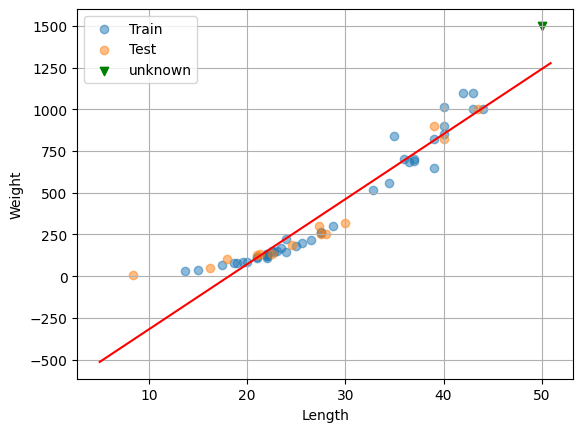

In [321]:
plt.scatter(X_train, y_train, alpha = 0.5, label= 'Train')

plt.scatter(X_test, y_test, alpha = 0.5, label = 'Test')

# 가상의 물고기
plt.scatter(50,1500, marker = 'v', color= 'green', label= 'unknown')

#선형회귀 직선그래프
x = np.arange(5, 51, 0.1).reshape((-1,1))
y_hat = x @ lin_reg.coef_ + lin_reg.intercept_          # (n,1) @ (1,) -> (n,)
plt.plot(x,y_hat, 'r-')

plt.grid()
plt.legend()
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

# 다항 회귀

2차항을 포함하는 선형 회귀

In [322]:
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [323]:
X_train_poly = np.c_[X_train ** 2, X_train]

In [324]:
X_train_poly.shape

(42, 2)

In [325]:
X_train_poly[:5, :]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

In [326]:
lin_reg = LinearRegression()            # 모델 생성

In [327]:
lin_reg.fit(X_train_poly, y_train)      # 모델 훈련 -> y = ax^2 +bx + c 함수의 계수 a,b와 절편 y를 찾음.

LinearRegression()

In [328]:
lin_reg.coef_           # (2,) shape의 1차원 배열 # <- 특성이 2개이기 때문에

array([  1.01433211, -21.55792498])

In [329]:
lin_reg.intercept_

np.float64(116.0502107827827)

In [330]:
X_train_poly @ lin_reg.coef_ + lin_reg.intercept_
# (42,2) @ (2,) -> (42,)
# (42,) + scalar -> (42,)

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [331]:
train_pred = lin_reg.predict(X_train_poly)

In [332]:
train_pred

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [333]:
# 훈련 셋의 결정 계수
r2_score(y_train, train_pred)

0.9706807451768623

In [334]:
# 2차항을 포함하는 테스트 셋
X_test_poly = np.c_[X_test ** 2, X_test]

In [335]:
X_test_poly[:5,:]

array([[ 70.56,   8.4 ],
       [324.  ,  18.  ],
       [756.25,  27.5 ],
       [453.69,  21.3 ],
       [506.25,  22.5 ]])

In [336]:
test_pred = lin_reg.predict(X_test_poly)            # 테스트 셋의 예측값.

In [337]:
test_pred

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

In [338]:
# 테스트 셋의 결정 계수
r2_score(y_test, test_pred)

0.9775935108325122

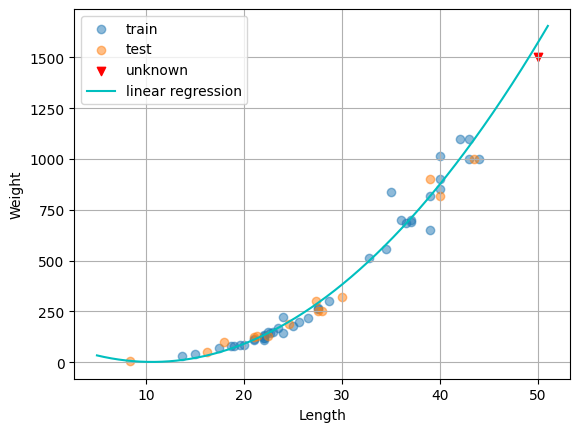

In [339]:
# 훈련 셋 산점도
plt.scatter(X_train, y_train, alpha = 0.5, label = 'train')
# 테스트 셋 산점도
plt.scatter(X_test, y_test, alpha = 0.5, label = 'test')

#가상 물고기
plt.scatter(50, 1500, color= 'red', label= 'unknown', marker= 'v')

# 선형회귀 2차함수 선그래프
x = np.arange(5,51,0.001)
x_poly = np.c_[x**2, x]
# print(x_poly.shape)
# [print(x_poly[:5,:])]
y_hat = x_poly @ lin_reg.coef_ + lin_reg.intercept_
plt.plot(x, y_hat, color = 'c', label = 'linear regression')

plt.legend()
plt.xlabel('Length')
plt.ylabel('Weight')
plt.grid()
plt.show()

# Pipeline

Pipeline: PolynomialFeatures + LinearRegression

## scikit-learn 클래스 철학
*   변환기(Transformer)
    *   `fit`, `fit_transform`, `transform` 메서드들을 가지고 있음.
    *   데이터 전처리(preprocessing) 과정에서 주로사용,
    *   예: StandardScaler, MinMaxScaler, PolynomialFeatures, ...

*   추정기(Estimator)
    *   `fit`, `predict`, `score` 메서드들을 가지고 있음.
    *   ML (분류/ 회귀) 알고리즘들을 구현한 클래스.
    *   KNeighborsClassifier, KNeighborsRegressor, LinearRegression, ...


In [340]:
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [341]:
poly = PolynomialFeatures(degree = 3, include_bias= False)          # 변환기 객체 생성

In [342]:
result = poly.fit_transform(X_train)            # 변환기를 사용해서 훈련 셋을 변환
print(poly.get_feature_names_out())
print(result.shape)
print(result[:5,:])

['x0' 'x0^2' 'x0^3']
(42, 3)
[[1.960000e+01 3.841600e+02 7.529536e+03]
 [2.200000e+01 4.840000e+02 1.064800e+04]
 [1.870000e+01 3.496900e+02 6.539203e+03]
 [1.740000e+01 3.027600e+02 5.268024e+03]
 [3.600000e+01 1.296000e+03 4.665600e+04]]


In [343]:
# Pipeline으로 연결할 변환기 생성
poly = PolynomialFeatures(degree=2, include_bias= False)

# Pipeline으로 연결할 추정기 생성
reg = LinearRegression()

# Pipeline 생성
model = Pipeline(steps = [('poly_features', poly),('lin_reg', reg)])

In [344]:
model

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [345]:
# 모델 훈련(Pipeline.fir 메서드 호출): (1) 변환기 fit_transform   (2) 추정기 fit
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [346]:
model['lin_reg'].coef_

array([-21.55792498,   1.01433211])

In [347]:
model['lin_reg'].intercept_

np.float64(116.05021078278395)

In [348]:
model.predict(X_train)          # 훈련 셋 예측값

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [349]:
model.predict(X_test)           # 테스트 셋 예측값

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

# Perch(농어)의 모든 특성(Length, Diagonal, Height, Width)을 사용한 무게 예측

*   Perch 데이터프레임에서 특성배열(2차원) X, 타겟 배열(1차원) y를 만듦.
*   훈련 셋/테스트 셋 분리
*   KNN 모델 생성. 훈련, 예측, 평가
*   LinearRegression 모델 생성, 훈련, 예측, 평가.
*   PolynomialFeatures(degree = 2), LinearRegression, Pipeline을 사용한 모델을 생성, 예측, 평가

In [350]:
path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [351]:
fish = pd.read_csv(path)

In [352]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [353]:
perch = fish[fish.Species == 'Perch']

In [354]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [355]:
X = perch[['Length','Diagonal','Height','Width']].values

In [356]:
X

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415],
       [18.    , 19.2   ,  5.2224,  3.3216],
       [18.7   , 19.4   ,  5.1992,  3.1234],
       [19.    , 20.2   ,  5.6358,  3.0502],
       [19.6   , 20.8   ,  5.1376,  3.0368],
       [20.    , 21.    ,  5.082 ,  2.772 ],
       [21.    , 22.5   ,  5.6925,  3.555 ],
       [21.    , 22.5   ,  5.9175,  3.3075],
       [21.    , 22.5   ,  5.6925,  3.6675],
       [21.3   , 22.8   ,  6.384 ,  3.534 ],
       [22.    , 23.5   ,  6.11  ,  3.4075],
       [22.    , 23.5   ,  5.64  ,  3.525 ],
       [22.    , 23.5   ,  6.11  ,  3.525 ],
       [22.    , 23.5   ,  5.875 ,  3.525 ],
       [22.    , 23.5   ,  5.5225,  3.995 ],
       [22.5   , 24.    ,  5.856 ,  3.624 ],
       [22.5   , 24.    ,  6.792 ,  3.624 ],
       [22.7   , 24.2   ,  5.9532,  3.63  ],
       [23

In [357]:
# 타겟 배열
y = perch[['Weight']].values

In [358]:
y[:5,:]

array([[ 5.9],
       [32. ],
       [40. ],
       [51.5],
       [70. ]])

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.25, random_state = 42)

In [360]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42, 4), (14, 4), (42, 1), (14, 1))

In [362]:
# KNN 모델 생성. 훈련, 예측, 평가
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [363]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [364]:
knn.score(X_train, y_train)

0.2857142857142857

In [365]:
train_pred = knn.predict(X_train)

In [366]:
train_pred

array([  85.,  120.,   85.,   40.,  700.,  145.,  650.,  650., 1000.,
        120.,   85.,  120.,  145.,  197., 1000.,  650.,  145.,  110.,
        197.,  650.,  300.,  180.,  700.,   32.,  150.,   32.,  700.,
        556.,  197.,  145.,  650.,  110.,  110.,  120., 1000.,  120.,
         85.,  700.,  120.,  145., 1000.,  514.])

In [368]:
test_pred = knn.predict(X_test)

In [369]:
test_pred

array([  32.,   85.,  197.,  110.,  120.,  650.,  218.,  145.,  650.,
        110., 1000.,   32.,  197.,  197.])

In [373]:
y_test

array([[   5.9],
       [ 100. ],
       [ 250. ],
       [ 130. ],
       [ 130. ],
       [ 820. ],
       [ 320. ],
       [ 188. ],
       [ 900. ],
       [ 125. ],
       [1000. ],
       [  51.5],
       [ 250. ],
       [ 300. ]])

In [374]:
# LinearRegression

lin_reg = LinearRegression()

In [375]:
X_train_poly = np.c_[X_train **2, X_train]

In [376]:
X_train_poly.shape

(42, 8)

In [378]:
X_train_poly[:5,:]

array([[ 384.16      ,  432.64      ,   26.39493376,    9.22215424,
          19.6       ,   20.8       ,    5.1376    ,    3.0368    ],
       [ 484.        ,  552.25      ,   34.515625  ,   12.425625  ,
          22.        ,   23.5       ,    5.875     ,    3.525     ],
       [ 349.69      ,  376.36      ,   27.03168064,    9.75562756,
          18.7       ,   19.4       ,    5.1992    ,    3.1234    ],
       [ 302.76      ,  342.25      ,   21.049744  ,    8.65242225,
          17.4       ,   18.5       ,    4.588     ,    2.9415    ],
       [1296.        , 1466.89      ,  112.55300281,   45.43838464,
          36.        ,   38.3       ,   10.6091    ,    6.7408    ]])

In [380]:
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [382]:
train_pred = lin_reg.predict(X_train_poly)

In [384]:
train_pred[:5,:]

array([[ 89.12926403],
       [126.14980648],
       [ 76.62762697],
       [ 59.36660278],
       [676.5094036 ]])

In [385]:
y_train[:5,]

array([[ 85.],
       [135.],
       [ 78.],
       [ 70.],
       [700.]])

In [386]:
r2_score(y_train, train_pred)

0.9894582172567841

In [388]:
# pipeline 사용
poly= PolynomialFeatures(degree = 2, include_bias = False)

In [389]:
result = poly.fit_transform(X_train)

In [390]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [391]:
result.shape

(42, 14)

In [392]:
reg = LinearRegression()

In [393]:
model = Pipeline(steps = [('poly_featuers', poly), ('lin_reg', reg)])

In [394]:
model

Pipeline(steps=[('poly_featuers', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [395]:
model.fit(X_train, y_train)

Pipeline(steps=[('poly_featuers', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [396]:
model.predict(X_train)

array([[  86.22462498],
       [ 117.8371985 ],
       [  65.36623277],
       [  51.32036181],
       [ 688.61814191],
       [ 166.09437243],
       [ 880.6739519 ],
       [ 900.30918145],
       [ 991.55155076],
       [ 111.61287566],
       [ 111.82615306],
       [ 126.79630184],
       [ 203.74163857],
       [ 256.18282041],
       [1018.52857265],
       [ 889.87606203],
       [ 151.71744742],
       [ 128.8552342 ],
       [ 262.18048814],
       [ 958.88194506],
       [ 509.75756107],
       [ 209.09874055],
       [ 732.73599683],
       [  63.71933794],
       [ 126.00056859],
       [  43.36490993],
       [ 648.48671444],
       [ 818.10553377],
       [ 311.20892879],
       [ 143.06230598],
       [ 721.921373  ],
       [  96.56262516],
       [ 125.94007862],
       [ 142.94478702],
       [1050.25814685],
       [ 158.62005849],
       [  60.19799201],
       [ 683.20753036],
       [ 139.33275961],
       [ 226.26744371],
       [1060.55561024],
       [ 595.455

In [399]:
model.predict(X_test)

array([[  23.11093892],
       [  16.86703258],
       [ 283.14558245],
       [ 126.83444969],
       [ 121.43654058],
       [ 735.72232422],
       [ 321.38687695],
       [ 167.93520462],
       [ 934.45200382],
       [  93.33407336],
       [1221.49026679],
       [  20.19532502],
       [ 247.09413925],
       [ 243.72607029]])